**Section 1 - IMF API

In [4]:
import requests
import pandas as pd
from datetime import datetime, timedelta
import json
from pandas.io.json import json_normalize

In [329]:

# Look for the correct database in the IMF stats
url = 'http://dataservices.imf.org/REST/SDMX_JSON.svc/'
key = 'Dataflow'  # Method with series information
search_term = 'Soundness'  # Term to find in series names
series_list = requests.get(f'{url}{key}').json()\
            ['Structure']['Dataflows']['Dataflow']
# Use dict keys to navigate through results:
for series in series_list:
    if search_term in series['Name']['#text']:
        print(f"{series['Name']['#text']}: {series['KeyFamilyRef']['KeyFamilyID']}")

Financial Soundness Indicators (FSIs): FSI
Financial Soundness Indicators: Reporting entities: FSIRE


In [330]:
# Look for the dimensions of the series
key = 'DataStructure/FSI' 
dimension_list = requests.get(f'{url}{key}').json()\
            ['Structure']['KeyFamilies']['KeyFamily']\
            ['Components']['Dimension']
for n, dimension in enumerate(dimension_list):
    print(f"Dimension {n+1}: {dimension['@codelist']}")

Dimension 1: CL_FREQ
Dimension 2: CL_AREA_FSI
Dimension 3: CL_INDICATOR_FSI


In [331]:
# Find the code for each dimension
key = f"CodeList/{dimension_list[2]['@codelist']}"
code_list = requests.get(f'{url}{key}').json()\
	    ['Structure']['CodeLists']['CodeList']['Code']
for code in code_list:
    print(f"{code['Description']['#text']}: {code['@value']}")

Financial Soundness Indicators, Balance Sheets and Income Statements, Deposit-takers, Additional series, Domestic government securities owned (market value), Euros: FS_ODX_GSD_MV_EUR
Financial Soundness Indicators, Balance Sheets and Income Statements, Deposit-takers, Additional series, Domestic government securities owned (market value), National Currency: FS_ODX_GSD_MV_XDC
Financial Soundness Indicators, Balance Sheets and Income Statements, Deposit-takers, Additional series, Domestic government securities owned (market value), US Dollars: FS_ODX_GSD_MV_USD
Financial Soundness Indicators, Balance Sheets and Income Statements, Deposit-takers, Additional series, Gross loans to the public sector, Euros: FS_ODX_AFLG_PS_EUR
Financial Soundness Indicators, Balance Sheets and Income Statements, Deposit-takers, Additional series, Gross loans to the public sector, National Currency: FS_ODX_AFLG_PS_XDC
Financial Soundness Indicators, Balance Sheets and Income Statements, Deposit-takers, Additi

In [325]:
# Specify the requested data
# NPL = FSANL_PT , TCR = FSKRC_PT, T1 =  FSKRTC_PT, NIM = FSEIM_PT, ROA = FSERA_PT, ROE = FSERE_PT, LA7ST = FSLS_PT, 
# LA/TA = FSLT_PT, net open position = FSSNO_PT, 
# Macro CPI: PCPI_IX, Number of banks, FAS = FCIODC_NUM, FCIODU_NUM, FCIODMF_NUM, FCIOFMFN_NUM, FCIODD_NUM

url = 'http://dataservices.imf.org/REST/SDMX_JSON.svc/'
key = 'CompactData/FSI/Q.DE+NL+AT+IT+ES.FSANL_PT' # 
#AT+DE+IT+NL+ES
# Navigate to series in API-returned JSON data
data = (requests.get(f'{url}{key}').json()
        ['CompactData']['DataSet']['Series'])

print(data) # Print data


[{'@FREQ': 'Q', '@REF_AREA': 'IT', '@INDICATOR': 'FSANL_PT', '@UNIT_MULT': '0', '@TIME_FORMAT': 'P3M', 'Obs': [{'@TIME_PERIOD': '2005-Q4', '@OBS_VALUE': '6.99617313682385'}, {'@TIME_PERIOD': '2006-Q2', '@OBS_VALUE': '6.56811457626493'}, {'@TIME_PERIOD': '2006-Q4', '@OBS_VALUE': '6.56811457626493'}, {'@TIME_PERIOD': '2007-Q2', '@OBS_VALUE': '5.56742077301543'}, {'@TIME_PERIOD': '2007-Q4', '@OBS_VALUE': '5.7776082194137'}, {'@TIME_PERIOD': '2008-Q2', '@OBS_VALUE': '5.43645145566009'}, {'@TIME_PERIOD': '2008-Q4', '@OBS_VALUE': '6.28258103994627'}, {'@TIME_PERIOD': '2009-Q2', '@OBS_VALUE': '7.72231460579594'}, {'@TIME_PERIOD': '2009-Q4', '@OBS_VALUE': '9.4463437392788'}, {'@TIME_PERIOD': '2010-Q2', '@OBS_VALUE': '9.86468001982426'}, {'@TIME_PERIOD': '2010-Q4', '@OBS_VALUE': '10.0278370674613'}, {'@TIME_PERIOD': '2011-Q2', '@OBS_VALUE': '10.9684429898043'}, {'@TIME_PERIOD': '2011-Q4', '@OBS_VALUE': '11.7423491843706'}, {'@TIME_PERIOD': '2012-Q2', '@OBS_VALUE': '12.9081633217096'}, {'@TIME_P

In [332]:
# Create pandas dataframe from the observations
df = pd.DataFrame({s['@REF_AREA']: # Each country/area
                   {i['@TIME_PERIOD']: float(i['@OBS_VALUE']) 
                    for i in s['Obs']} for s in data})

df.index = pd.to_datetime(df.index)
# Save cleaned dataframe as a csv file
df.to_csv('npl_ratio_quarterly_to_upload.csv', header=True)
print(df)

                   IT        NL        AT        ES
2005-10-01   6.996173       NaN       NaN  0.794366
2006-04-01   6.568115       NaN       NaN  0.739436
2006-10-01   6.568115       NaN       NaN  0.701195
2007-04-01   5.567421       NaN       NaN  0.749239
2007-10-01   5.777608       NaN       NaN  0.896581
2008-01-01        NaN  0.510854       NaN       NaN
2008-04-01   5.436451  0.865407       NaN  1.492789
2008-07-01        NaN  1.093333       NaN       NaN
2008-10-01   6.282581  1.681398       NaN  2.807694
2009-01-01        NaN  1.829189       NaN       NaN
2009-04-01   7.722315  2.441675       NaN  3.768974
2009-07-01        NaN  2.689266       NaN       NaN
2009-10-01   9.446344  3.201688       NaN  4.121031
2010-01-01        NaN  3.191778  2.279504       NaN
2010-04-01   9.864680  2.756128  2.413387  4.342693
2010-07-01        NaN  2.573606  2.580078       NaN
2010-10-01  10.027837  2.832349  2.830717  4.668372
2011-01-01        NaN  2.734346  2.724025       NaN
2011-04-01  

Text(0.5, 0, 'year')


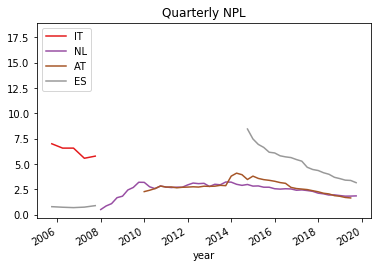

In [333]:
 
title = f'Quarterly NPL'


source = 'Source: IMF FSI'

# Basic plot
plot = df.plot(title=title, colormap='Set1')
plot = plot.set_xlabel('year')

print(plot)

**Section 2. Data wrangling**


In [5]:

df_npl_a=pd.read_csv('NPL_data.csv')
print(df_npl_a)
df_npl_a.describe()
# statistical overview of the data on the annual basis. One can see missing data, no index and wrong time - scale


    Unnamed: 0        ES        NL    DE         IT        AT
0   2005-01-01  0.794366       NaN  4.05   6.996173       NaN
1   2006-01-01  0.701195       NaN  3.41   6.568115  2.739429
2   2007-01-01  0.896581       NaN  2.65   5.777608  2.242467
3   2008-01-01  2.807694  1.681398  2.85   6.282581  1.903069
4   2009-01-01  4.121031  3.201688  3.31   9.446344  2.250423
5   2010-01-01  4.668372  2.832349  3.20  10.027837  2.830717
6   2011-01-01  6.007281  2.710877  3.03  11.742349  2.706816
7   2012-01-01  7.483904  3.097844  2.86  13.746370  2.813365
8   2013-01-01  9.380730  3.227169  2.70  16.542706  2.866542
9   2014-01-01  8.452782  2.982662  2.34  18.033047  3.473374
10  2015-01-01  6.162377  2.711985  1.97  18.064369  3.392837
11  2016-01-01  5.635258  2.540527  1.71  17.116239  2.695217
12  2017-01-01  4.460000  2.305427  1.50  14.383299  2.368895
13  2018-01-01  3.690000  1.959881  1.24   8.386283  1.882429
14  2019-01-01  3.160000  1.856651   NaN        NaN       NaN


,ES,NL,DE,IT,AT
count,15.000000,12.000000,14.000000,14.000000,13.000000
mean,4.561438,2.592372,2.630000,11.650951,2.628122
std,2.689314,0.532936,0.796811,4.611834,0.491161
min,0.701195,1.681398,1.240000,5.777608,1.882429
25%,2.983847,2.219041,2.062500,7.343701,2.250423
50%,4.460000,2.711431,2.775000,10.885093,2.706816
75%,6.084829,3.011458,3.157500,16.002854,2.830717
max,9.380730,3.227169,4.050000,18.064369,3.473374


In [6]:
df_npl_a.rename(columns = {'Unnamed: 0':'Date'}, inplace = True) # Rename of the date column to date
print(df_npl_a.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 6 columns):
Date    15 non-null object
ES      15 non-null float64
NL      12 non-null float64
DE      14 non-null float64
IT      14 non-null float64
AT      13 non-null float64
dtypes: float64(5), object(1)
memory usage: 800.0+ bytes
None


In [350]:
df_npl_a['Date'] = pd.DatetimeIndex(df_npl_a['Date']) # change string to datetime
print(df_npl_a)

         Date        ES        NL    DE         IT        AT
0  2005-01-01  0.794366       NaN  4.05   6.996173       NaN
1  2006-01-01  0.701195       NaN  3.41   6.568115  2.739429
2  2007-01-01  0.896581       NaN  2.65   5.777608  2.242467
3  2008-01-01  2.807694  1.681398  2.85   6.282581  1.903069
4  2009-01-01  4.121031  3.201688  3.31   9.446344  2.250423
5  2010-01-01  4.668372  2.832349  3.20  10.027837  2.830717
6  2011-01-01  6.007281  2.710877  3.03  11.742349  2.706816
7  2012-01-01  7.483904  3.097844  2.86  13.746370  2.813365
8  2013-01-01  9.380730  3.227169  2.70  16.542706  2.866542
9  2014-01-01  8.452782  2.982662  2.34  18.033047  3.473374
10 2015-01-01  6.162377  2.711985  1.97  18.064369  3.392837
11 2016-01-01  5.635258  2.540527  1.71  17.116239  2.695217
12 2017-01-01  4.460000  2.305427  1.50  14.383299  2.368895
13 2018-01-01  3.690000  1.959881  1.24   8.386283  1.882429
14 2019-01-01  3.160000  1.856651   NaN        NaN       NaN


In [351]:
df_npl_a.set_index('Date', inplace=True) # set date columns as index
print(df_npl_a)

                  ES        NL    DE         IT        AT
Date                                                     
2005-01-01  0.794366       NaN  4.05   6.996173       NaN
2006-01-01  0.701195       NaN  3.41   6.568115  2.739429
2007-01-01  0.896581       NaN  2.65   5.777608  2.242467
2008-01-01  2.807694  1.681398  2.85   6.282581  1.903069
2009-01-01  4.121031  3.201688  3.31   9.446344  2.250423
2010-01-01  4.668372  2.832349  3.20  10.027837  2.830717
2011-01-01  6.007281  2.710877  3.03  11.742349  2.706816
2012-01-01  7.483904  3.097844  2.86  13.746370  2.813365
2013-01-01  9.380730  3.227169  2.70  16.542706  2.866542
2014-01-01  8.452782  2.982662  2.34  18.033047  3.473374
2015-01-01  6.162377  2.711985  1.97  18.064369  3.392837
2016-01-01  5.635258  2.540527  1.71  17.116239  2.695217
2017-01-01  4.460000  2.305427  1.50  14.383299  2.368895
2018-01-01  3.690000  1.959881  1.24   8.386283  1.882429
2019-01-01  3.160000  1.856651   NaN        NaN       NaN


In [343]:
df_npl_a['index_shifted']= df_npl_a.index.shift(12, freq='M')
df_npl_a.rename(columns = {'index_shifted':'Date'}, inplace = True)
df_npl_a.set_index('Date', inplace=True)
print(df_npl_a.head())
# Shiftinf the date from beginning of the year to the end

                  ES        NL    DE        IT        AT
Date                                                    
2006-12-31  0.794366       NaN  4.05  6.996173       NaN
2007-12-31  0.701195       NaN  3.41  6.568115  2.739429
2008-12-31  0.896581       NaN  2.65  5.777608  2.242467
2009-12-31  2.807694  1.681398  2.85  6.282581  1.903069
2010-12-31  4.121031  3.201688  3.31  9.446344  2.250423


In [342]:
resampled_npl=df_npl_a.resample('Q').sum()
print(resampled.info())
print(resampled.head())
# resampling annual to quarterly as in the quarterly data DE column is missing and need to add

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 57 entries, 2005-12-31 to 2019-12-31
Freq: Q-DEC
Data columns (total 5 columns):
ES    57 non-null float64
NL    57 non-null float64
DE    57 non-null float64
IT    57 non-null float64
AT    57 non-null float64
dtypes: float64(5)
memory usage: 2.7 KB
None
                  ES   NL    DE        IT        AT
Date                                               
2005-12-31  0.794366  0.0  4.05  6.996173  0.000000
2006-03-31  0.000000  0.0  0.00  0.000000  0.000000
2006-06-30  0.000000  0.0  0.00  0.000000  0.000000
2006-09-30  0.000000  0.0  0.00  0.000000  0.000000
2006-12-31  0.701195  0.0  3.41  6.568115  2.739429


In [341]:
df_npl_q_de=resampled_npl['DE']# taking out annual DE to later combine with the quarterly dat
print(df_npl_q_de.head())




Date
2005-12-31    4.05
2006-03-31    0.00
2006-06-30    0.00
2006-09-30    0.00
2006-12-31    3.41
Freq: Q-DEC, Name: DE, dtype: float64


In [339]:
df_npl_q=pd.read_csv('NPL_data_quarterly.csv')
print(df_npl_q)
# download of the quarterly data

    Unnamed: 0         IT        NL        AT        ES
0   2005-10-01   6.996173       NaN       NaN  0.794366
1   2006-04-01   6.568115       NaN       NaN  0.739436
2   2006-10-01   6.568115       NaN       NaN  0.701195
3   2007-04-01   5.567421       NaN       NaN  0.749239
4   2007-10-01   5.777608       NaN       NaN  0.896581
5   2008-01-01        NaN  0.510854       NaN       NaN
6   2008-04-01   5.436451  0.865407       NaN  1.492789
7   2008-07-01        NaN  1.093333       NaN       NaN
8   2008-10-01   6.282581  1.681398       NaN  2.807694
9   2009-01-01        NaN  1.829189       NaN       NaN
10  2009-04-01   7.722315  2.441675       NaN  3.768974
11  2009-07-01        NaN  2.689266       NaN       NaN
12  2009-10-01   9.446344  3.201688       NaN  4.121031
13  2010-01-01        NaN  3.191778  2.279504       NaN
14  2010-04-01   9.864680  2.756128  2.413387  4.342693
15  2010-07-01        NaN  2.573606  2.580078       NaN
16  2010-10-01  10.027837  2.832349  2.830717  4

In [340]:
df_npl_q.rename(columns = {'Unnamed: 0':'Date'}, inplace = True)
df_npl_q['Date'] = pd.DatetimeIndex(df_npl_q['Date'])
df_npl_q.set_index('Date', inplace=True) 
print(df_npl_q)# set date columns as index

                   IT        NL        AT        ES
Date                                               
2005-10-01   6.996173       NaN       NaN  0.794366
2006-04-01   6.568115       NaN       NaN  0.739436
2006-10-01   6.568115       NaN       NaN  0.701195
2007-04-01   5.567421       NaN       NaN  0.749239
2007-10-01   5.777608       NaN       NaN  0.896581
2008-01-01        NaN  0.510854       NaN       NaN
2008-04-01   5.436451  0.865407       NaN  1.492789
2008-07-01        NaN  1.093333       NaN       NaN
2008-10-01   6.282581  1.681398       NaN  2.807694
2009-01-01        NaN  1.829189       NaN       NaN
2009-04-01   7.722315  2.441675       NaN  3.768974
2009-07-01        NaN  2.689266       NaN       NaN
2009-10-01   9.446344  3.201688       NaN  4.121031
2010-01-01        NaN  3.191778  2.279504       NaN
2010-04-01   9.864680  2.756128  2.413387  4.342693
2010-07-01        NaN  2.573606  2.580078       NaN
2010-10-01  10.027837  2.832349  2.830717  4.668372
2011-01-01  

In [335]:
df_npl_q['index_shifted']= df_npl_q.index.shift(3, freq='M')
df_npl_q.rename(columns = {'index_shifted':'Date'}, inplace = True)
df_npl_q.set_index('Date', inplace=True)
print(df_npl_q.head())
# shifting the dates

                  IT  NL  AT        ES
Date                                  
2006-03-31  6.996173 NaN NaN  0.794366
2006-09-30  6.568115 NaN NaN  0.739436
2007-03-31  6.568115 NaN NaN  0.701195
2007-09-30  5.567421 NaN NaN  0.749239
2008-03-31  5.777608 NaN NaN  0.896581


In [334]:
df_npl = df_npl_q.join(df_npl_q_de)
print(df_npl.head())

# joining the DE column

                  IT  NL  AT        ES    DE
Date                                        
2005-12-31  6.996173 NaN NaN  0.794366  4.05
2006-06-30  6.568115 NaN NaN  0.739436  0.00
2006-12-31  6.568115 NaN NaN  0.701195  3.41
2007-06-30  5.567421 NaN NaN  0.749239  0.00
2007-12-31  5.777608 NaN NaN  0.896581  2.65


In [302]:
df_npl_replaced = df_npl.replace(0, NaN)
# replacing 0 values with NaN in the DE column

In [312]:
df_npl_resampled = df_npl_replaced.resample('Q').first().interpolate('linear').round(2)
# resampling combined table to get missing data by linear interpolation, roinding

In [315]:
df_npl_tidy = df_npl_resampled.dropna()
print(df_npl_tidy)
# dropping NaN values

               IT    NL    AT    ES    DE
Date                                     
2010-03-31   9.66  3.19  2.28  4.23  3.28
2010-06-30   9.86  2.76  2.41  4.34  3.26
2010-09-30   9.95  2.57  2.58  4.51  3.23
2010-12-31  10.03  2.83  2.83  4.67  3.20
2011-03-31  10.50  2.73  2.72  4.97  3.16
2011-06-30  10.97  2.68  2.74  5.27  3.12
2011-09-30  11.36  2.72  2.66  5.64  3.07
2011-12-31  11.74  2.71  2.71  6.01  3.03
2012-03-31  12.33  2.94  2.72  6.54  2.99
2012-06-30  12.91  3.12  2.75  7.07  2.94
2012-09-30  13.33  3.06  2.73  7.28  2.90
2012-12-31  13.75  3.10  2.81  7.48  2.86
2013-03-31  14.44  2.78  2.80  7.87  2.82
2013-06-30  15.12  3.00  2.82  8.25  2.78
2013-09-30  15.83  2.95  2.90  8.81  2.74
2013-12-31  16.54  3.23  2.87  9.38  2.70
2014-03-31  16.90  3.21  3.81  9.19  2.61
2014-06-30  17.26  3.00  4.10  9.00  2.52
2014-09-30  17.65  2.90  3.95  8.73  2.43
2014-12-31  18.03  2.98  3.47  8.45  2.34
2015-03-31  18.00  2.82  3.81  7.47  2.25
2015-06-30  17.97  2.84  3.58  6.9

Text(0.5, 0, 'year')


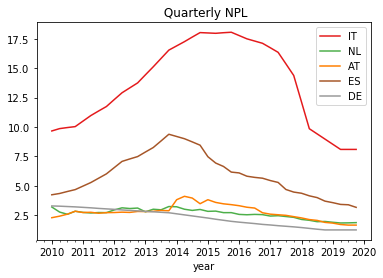

In [314]:
title=f' Quarterly NPL'
plot = df_npl_tidy.plot(title=title, colormap='Set1')
plot = plot.set_xlabel('year')

print(plot)
# plot of tidy data